In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt
from matplotlib.pyplot import figure

In [3]:
### SET UP DF ###

xlsx = pd.ExcelFile('CSP Thesis - Data - 11 March 2023.xlsx')
lang_df = pd.read_excel(xlsx, 's2t')
lang_df.to_numpy()
lang_df_aes = round(lang_df,2)
print(lang_df_aes)

## SET UP LANGUAGE DICTIONARY FOR FUTURE ITERATION ###

lang_dict = {
    0: "en",
    1: "de",
    2: "fr",
    3: "es",
    4: "it",
    5: "pt"
}


  Unnamed: 0    en    de    fr    es    it    pt
0         en  0.00  0.74  0.74  0.75  0.73  0.69
1         de  0.72  0.00  0.71  0.72  0.72  0.66
2         fr  0.72  0.73  0.00  0.76  0.75  0.68
3         es  0.73  0.73  0.76  0.00  0.77  0.73
4         it  0.71  0.73  0.75  0.77  0.00  0.68
5         pt  0.63  0.39  0.39  0.43  0.38  0.00


In [4]:
### SET UP GRAPH ###

en = lang_df['en'].values
de = lang_df['de'].values
fr = lang_df['fr'].values
es = lang_df['es'].values
it = lang_df['it'].values
pt = lang_df['pt'].values

lang_arr = np.array([en,de,fr,es,it,pt])
lang_mat = np.transpose(lang_arr)
print(lang_mat)
lang_mat = np.log(1/lang_mat)

lang_mat

[[0.         0.74470711 0.73514932 0.75354582 0.72524434 0.6879518 ]
 [0.71625918 0.         0.7119723  0.7205466  0.71778876 0.65662116]
 [0.71595013 0.73381281 0.         0.76075548 0.7517792  0.68365264]
 [0.73057878 0.7311604  0.75536603 0.         0.76866347 0.73094815]
 [0.71031809 0.72828805 0.75386763 0.76883543 0.         0.68437028]
 [0.63042468 0.38865665 0.38723391 0.42864978 0.37939063 0.        ]]


/tmp/ipykernel_62/1058874530.py:13: RuntimeWarning: divide by zero encountered in divide
  lang_mat = np.log(1/lang_mat)


array([[       inf, 0.29476428, 0.30768164, 0.28296545, 0.32124666,
        0.3740365 ],
       [0.33371319,        inf, 0.33971628, 0.32774518, 0.33157997,
        0.42064805],
       [0.33414476, 0.30950131,        inf, 0.27344329, 0.28531262,
        0.38030533],
       [0.31391821, 0.31312241, 0.28055284,        inf, 0.26310203,
        0.31341275],
       [0.3420424 , 0.31705863, 0.28253849, 0.26287834,        inf,
        0.37925616],
       [0.46136159, 0.94505898, 0.94872634, 0.84711505, 0.96918893,
               inf]])

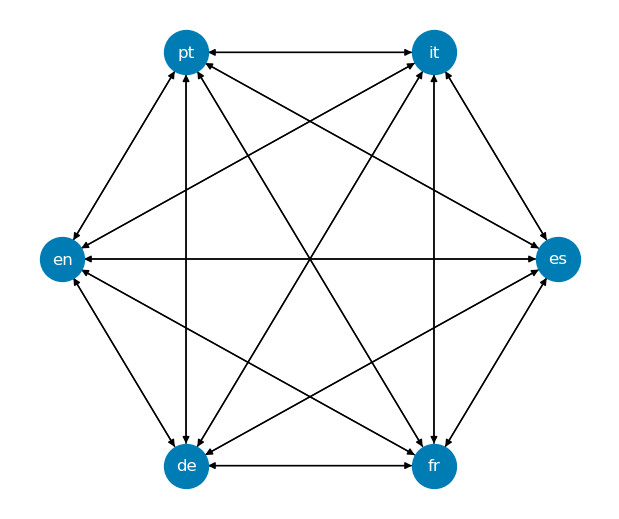

In [5]:
### CREATE GRAPH ###

G = nx.DiGraph(lang_mat)
G = nx.relabel_nodes(G, lang_dict, copy=True)

#remove src-src edges 
G.remove_edge('en','en')
G.remove_edge('de','de')
G.remove_edge('fr','fr')
G.remove_edge('it','it')
G.remove_edge('es','es')
G.remove_edge('pt','pt')

figure(figsize=(6,5))
nx.draw_shell(G,with_labels=True, 
              node_size = 1000, node_color='#007CB4',
             font_color = 'white')

#G.nodes
#G.edges
#G.get_edge_data('en','fr')

In [6]:
### BELLMAN FORD EXPERIMENT ###

#BF en
length_en, path_en = nx.single_source_bellman_ford(G,source='en')
length_en
path_en

#BF de
length_de, path_de = nx.single_source_bellman_ford(G,source='de')
length_de
path_de

#BF fr
length_fr, path_fr = nx.single_source_bellman_ford(G,source='fr')
length_fr
path_fr

#BF es
length_es, path_es = nx.single_source_bellman_ford(G,source='es')
length_es
path_es

#BF it
length_it, path_it = nx.single_source_bellman_ford(G,source='it')
length_it
path_it

#BF pt
length_pt, path_pt = nx.single_source_bellman_ford(G,source='pt')
length_pt
path_pt

print(path_en, "\n\n", path_de, "\n\n", path_fr, "\n\n", path_es, "\n\n", path_it, "\n\n", path_pt)
print(np.exp(-length_pt['de']))
print(np.exp(length_pt['de']))
lang_df

{'en': ['en'], 'de': ['en', 'de'], 'fr': ['en', 'fr'], 'es': ['en', 'es'], 'it': ['en', 'it'], 'pt': ['en', 'pt']} 

 {'de': ['de'], 'en': ['de', 'en'], 'fr': ['de', 'fr'], 'es': ['de', 'es'], 'it': ['de', 'it'], 'pt': ['de', 'pt']} 

 {'fr': ['fr'], 'en': ['fr', 'en'], 'de': ['fr', 'de'], 'es': ['fr', 'es'], 'it': ['fr', 'it'], 'pt': ['fr', 'pt']} 

 {'es': ['es'], 'en': ['es', 'en'], 'de': ['es', 'de'], 'fr': ['es', 'fr'], 'it': ['es', 'it'], 'pt': ['es', 'pt']} 

 {'it': ['it'], 'en': ['it', 'en'], 'de': ['it', 'de'], 'fr': ['it', 'fr'], 'es': ['it', 'es'], 'pt': ['it', 'pt']} 

 {'pt': ['pt'], 'en': ['pt', 'en'], 'de': ['pt', 'en', 'de'], 'fr': ['pt', 'en', 'fr'], 'es': ['pt', 'en', 'es'], 'it': ['pt', 'en', 'it']}
0.46948173872021903
2.130008299632578


,Unnamed: 0,en,de,fr,es,it,pt
0,en,0.000000,0.744707,0.735149,0.753546,0.725244,0.687952
1,de,0.716259,0.000000,0.711972,0.720547,0.717789,0.656621
2,fr,0.715950,0.733813,0.000000,0.760755,0.751779,0.683653
3,es,0.730579,0.731160,0.755366,0.000000,0.768663,0.730948
4,it,0.710318,0.728288,0.753868,0.768835,0.000000,0.684370
5,pt,0.630425,0.388657,0.387234,0.428650,0.379391,0.000000
